In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
def corresponding_vector(id):
    """This function takes natural number form 1-4 as an input and returns 
    the corresponding initial vector to work with."""

    if id == 1:
        return np.array([1, 0, 0, 0])
    elif id == 2:
        return np.array([0, 1, 0, 0])
    elif id == 3:
        return np.array([0, 0, 1, 0])
    elif id == 4:
        return np.array([0, 0, 0, 1])
    else:
        raise ValueError("Input must be a natural number from 1 to 4.")

In [3]:
device = qml.device("default.qubit", wires=2)

@qml.qnode(device)
def bell_state_circuit(id):
    """The function returns different types of bell states based on the input id."""
    init_state = corresponding_vector(id)
    qml.StatePrep(init_state, wires = [0,1])
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])

    return qml.state() , qml.probs(wires=[0,1])


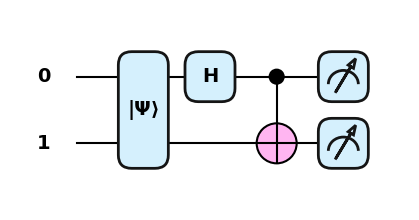

Bell State 1:
State Vector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Probabilities: [0.5 0.  0.  0.5]

Bell State 2:
State Vector: [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
Probabilities: [0.  0.5 0.5 0. ]

Bell State 3:
State Vector: [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
Probabilities: [0.5 0.  0.  0.5]

Bell State 4:
State Vector: [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]
Probabilities: [0.  0.5 0.5 0. ]



In [7]:
fig, ax = qml.draw_mpl(bell_state_circuit, style = "pennylane")(1)
fig.set_size_inches(4,2)
plt.show()
for i in range(1,5):
    state, probs = bell_state_circuit(i)
    print(f"Bell State {i}:")
    print("State Vector:", state)
    print("Probabilities:", probs)
    print(
)